# Module 3 R Practice 

The exercises in this notebook are in R using the ggplot2 package. ggplot2 is created by Hadley Wickham based on the **grammar of graphics approach** of Leland Wilkinson. It abstracts the graphics into separate components regarding the data, aesthetics, geometric objects, transformations, etc. and makes it possible to create different layers of visualization on the same graphics. ggplot2 is more verbose to create simple graphics, but it is less verbose and provides an object-oriented feel for more complex graphics. 

The dataset used in this notebook is the tipping information recorded in a restaurant and has the following attributes:

* total_bill in dollars
* tip in dollars
* sex of the payer 
* whether there were smokers in the party
* day of the week
* time of day
* size of the party

### References for plotting in R


* **Reference** [ggplot documentation](https://ggplot2.tidyverse.org/reference/)
* **Reference** [R ggplot package](https://cran.r-project.org/web/packages/ggplot2/ggplot2.pdf)
* **Reference** [R ggplot cheatsheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* **Reference** [ggplot examples](http://tutorials.iq.harvard.edu/R/Rgraphics/Rgraphics.html)
* **Reference** [R color cheatsheet](http://www.guianaplants.stir.ac.uk/seminar/materials/colorPaletteCheatsheet.pdf)

Read the data from tips text file in "/dsa/data/all_datasets/tips.txt" into the dataframe called tips_data.

In [1]:
library(ggplot2)

tips_data = read.csv('/dsa/data/all_datasets/tips.txt')
head(tips_data)

total_bill,tip,sex,smoker,day,time,size
<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>
16.99,1.01,Female,No,Sun,Dinner,2
10.34,1.66,Male,No,Sun,Dinner,3
21.01,3.50,Male,No,Sun,Dinner,3
23.68,3.31,Male,No,Sun,Dinner,2
24.59,3.61,Female,No,Sun,Dinner,4
25.29,4.71,Male,No,Sun,Dinner,4


**Activity 1:** Plot a bar chart where the height of the bar shows the **number** of tips per day. By using a count statistics, we simply plot the number of tips, not the amount.

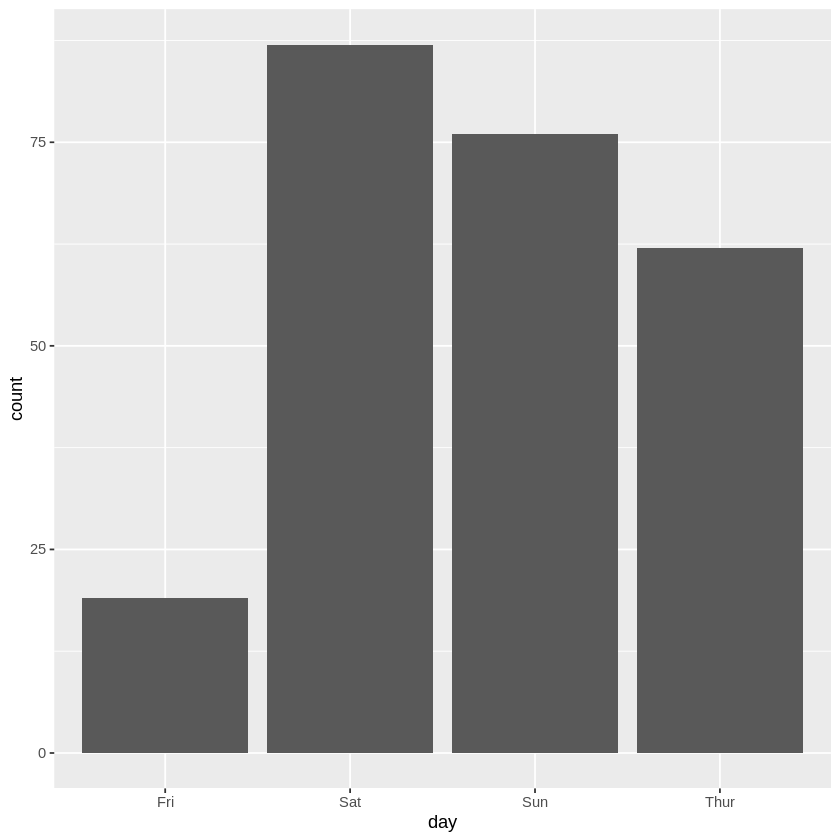

In [2]:
# stat="count" is default, we can omit it. 
p <- ggplot(tips_data, aes(x=day)) + geom_bar(stat="count")
p

**Activity 2:** Plot a bar chart where the height of the bar shows the **total amount** of tips per day. 

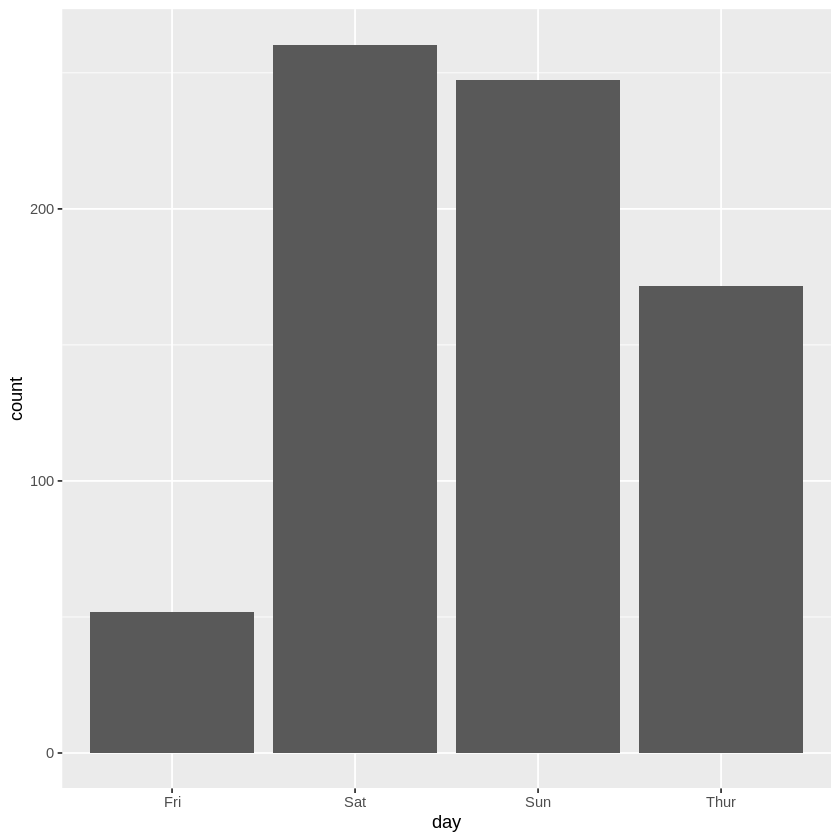

In [3]:
(p <- ggplot(tips_data, aes(x=day,weight=tip)) + geom_bar())

**Activity 3:** Plot a bar chart where the height of the bar shows the **total amount** of tips per day **for each sex.** Here, we change the aesthetics of the bar, color fill visual channel will represent the sex. 

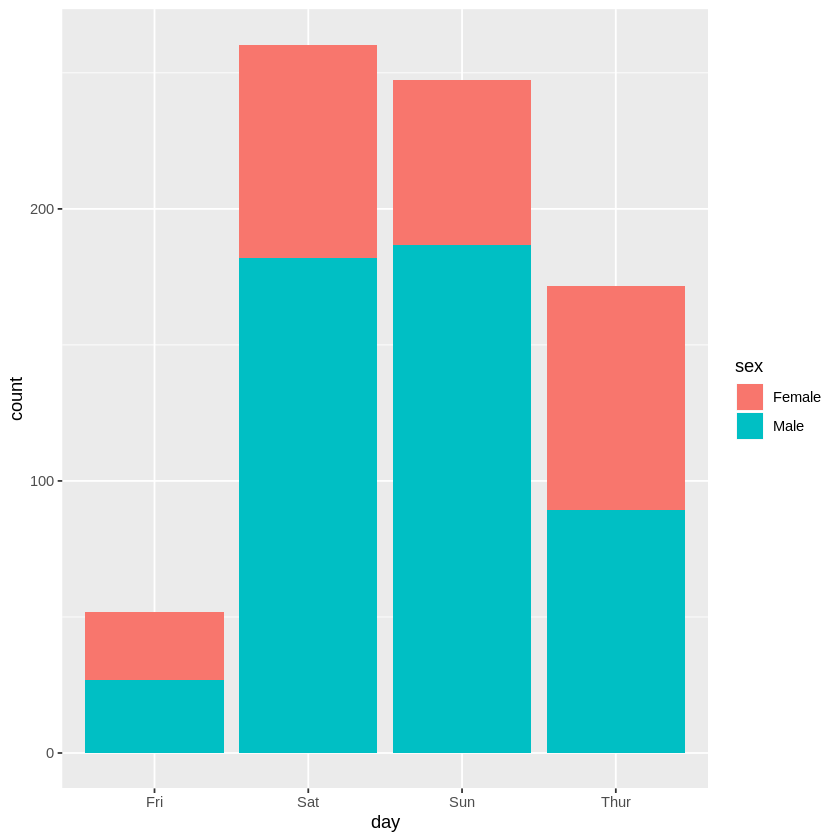

In [4]:
(p <- ggplot(tips_data, aes(x=day,weight=tip)) + geom_bar(aes(fill=sex)))

**This was a *stacked bar chart* and it does not provide a good comparison between two categories (sex of the payers)**; we know that aligned bars give better visual comparison. So let's change this:

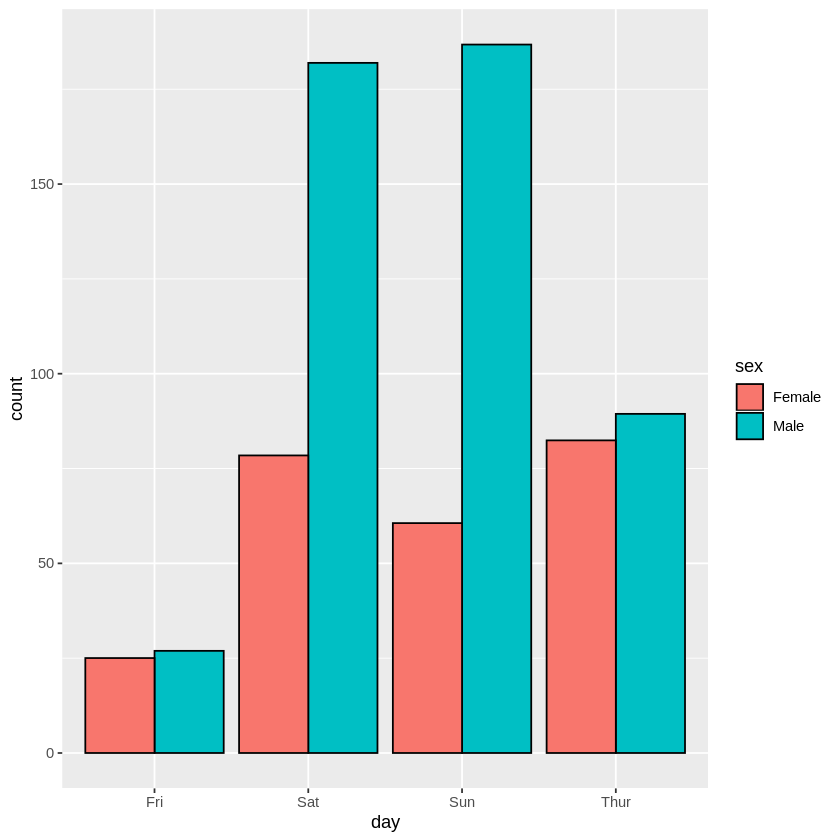

In [5]:
(p <- ggplot(tips_data, aes(x=day,weight=tip)) + geom_bar(position="dodge",aes(fill=sex),colour="black"))

**This is better. Now we can easily compare sexes and days since length is perceptually very effective for comparison.**

**So we can see Fridays are not a good day for waiters according to this data set. Let's change the colors by adding *scales*.** 

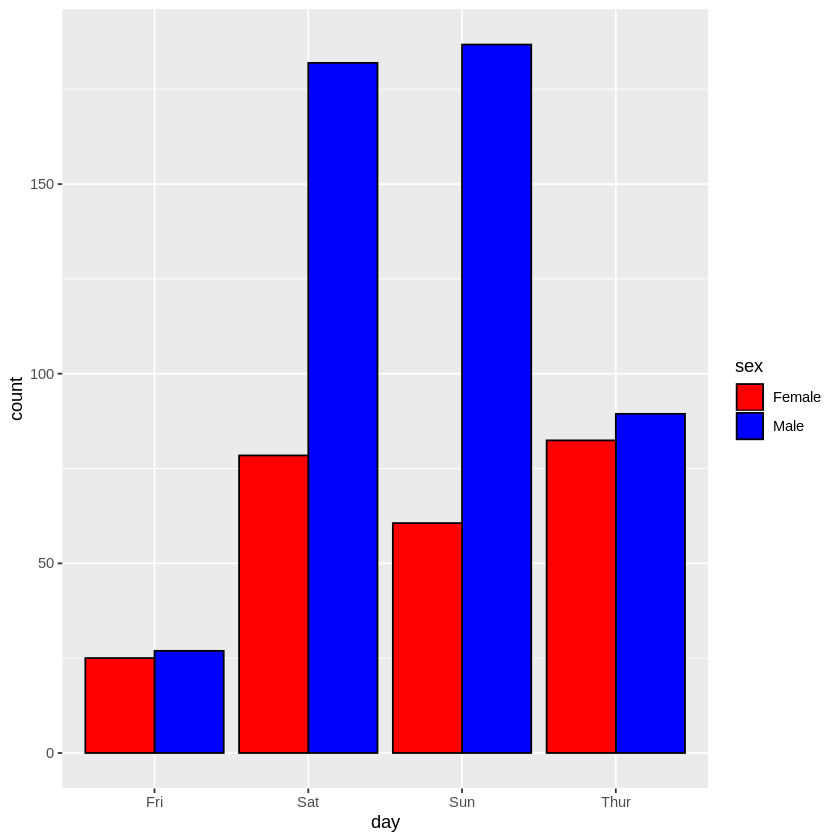

In [6]:
(p + scale_fill_manual(values = c("red","blue")))

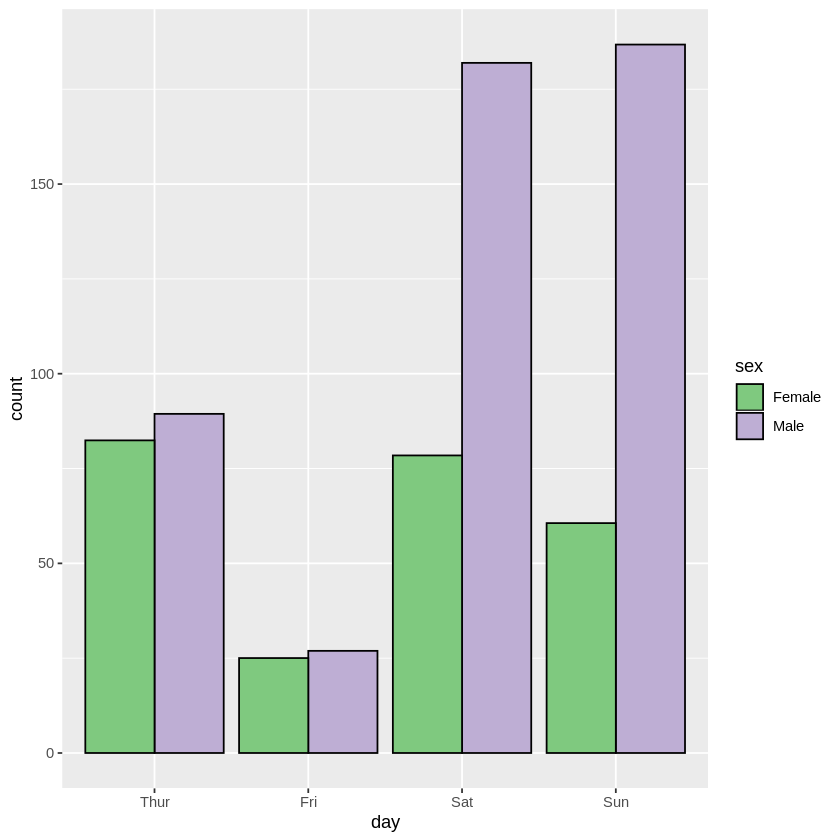

In [7]:
#let's use colors that have less visual weight and reorder

(p + scale_fill_brewer(palette="Accent") + scale_x_discrete(limits=c("Thur","Fri","Sat","Sun"))) 

**Activity 4:** Plot a scatter plot of **tip vs. total bill** using **sex and smoker** status as **facets**.

So here, positions in the plots represent tip and total bill, different plot locations represent sex (vertical) and smoker(horizontal). **Facets are also called *small multiples*.** 

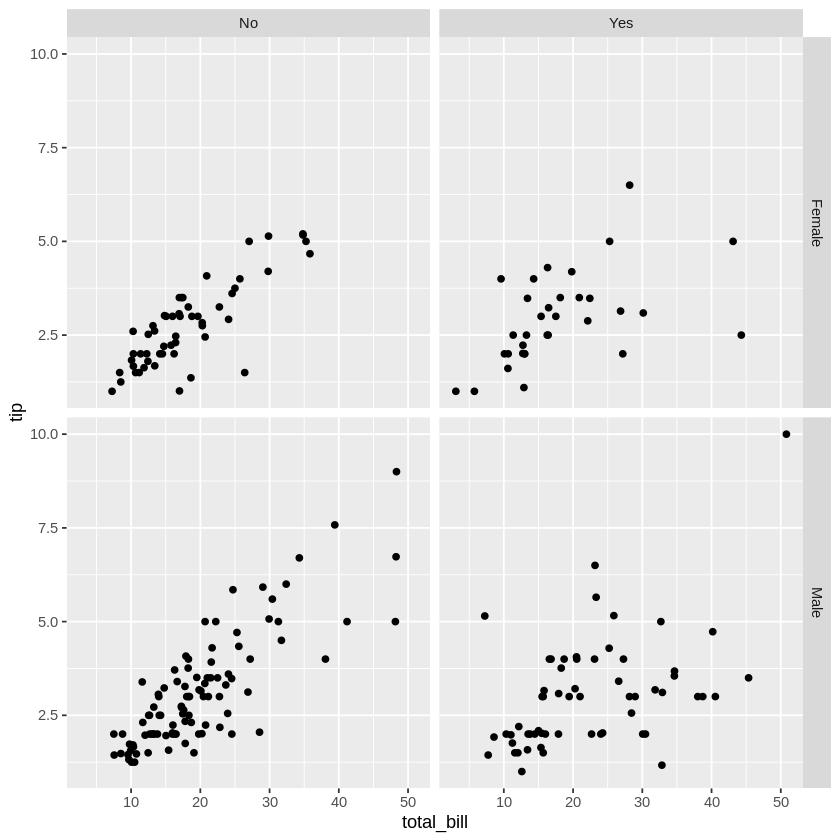

In [8]:
(p <- ggplot(tips_data, aes(x=total_bill,y=tip)) + geom_point() + facet_grid(sex ~ smoker))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


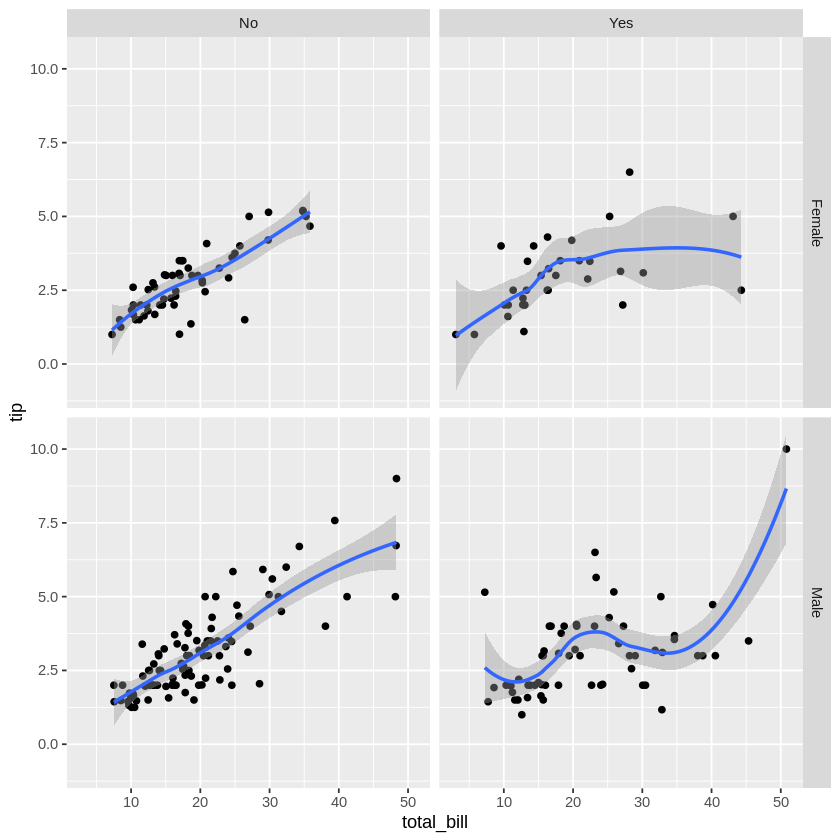

In [9]:
# We can also add a fitted curve to it as another layer to see the relation between total bill and the tip amount. 


(p <- ggplot(tips_data, aes(x=total_bill,y=tip)) + geom_point() + facet_grid(sex ~ smoker)) + geom_smooth()

**Activity 5:** Draw a scatter plot for variables **total_bill** and **tip** using **sex and smoker** as facets. Map the **day** and **size** attributes to **color** and **shape** visual variables, respectively.

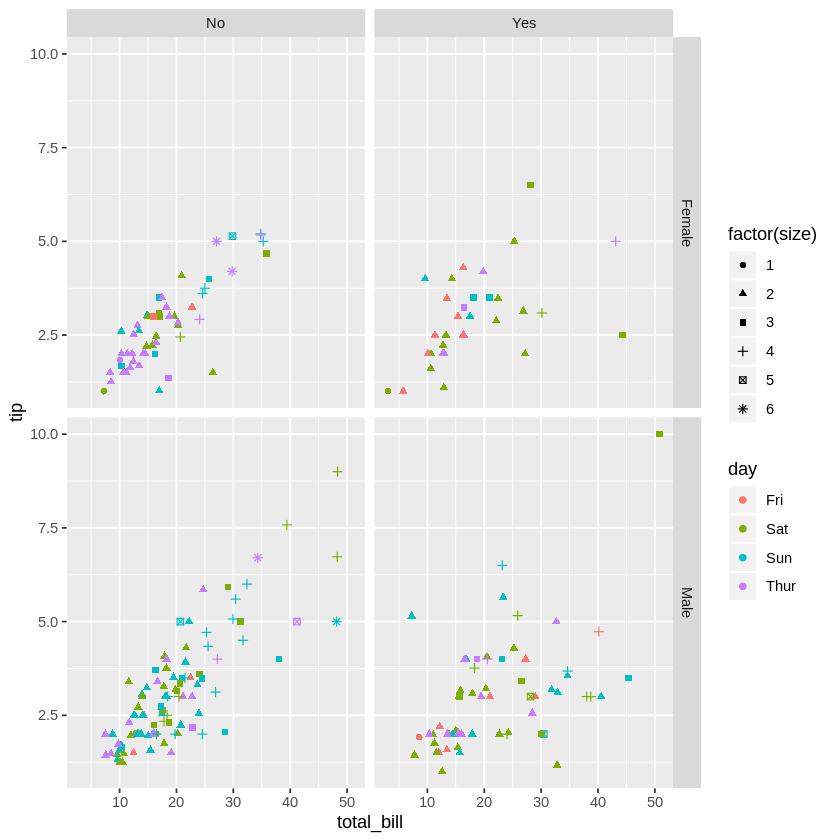

In [10]:
p <- ggplot(tips_data, aes(x=total_bill,y=tip,color=day,shape=factor(size))) + geom_point()
p + facet_grid(sex ~ smoker)

**The above plot is reimplementation of the plot from the bottom of the page [here](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html), and is a nice example of how to mess up the visual variables.**

We know that **size** attribute is **quantitative**; using **shape** visual variable for the size does not make an efficient visualization. We can't compare shapes!

Similarly, **day** attribute is **ordinal**; so we need a **sequential** color palette in order to map it to colors that we can preattentively order and compare. 

**Let's redo this plot the right way!**

**YOUR TURN: Activity 6:** Draw a scatter plot for variables **total_bill** and **tip** using **sex** and **smoker** as facets. Map the **day** and **size** attributes to **color** and **size** visual variables, respectively. Use a **sequential** color palette.

Warning message:
“Using size for a discrete variable is not advised.”

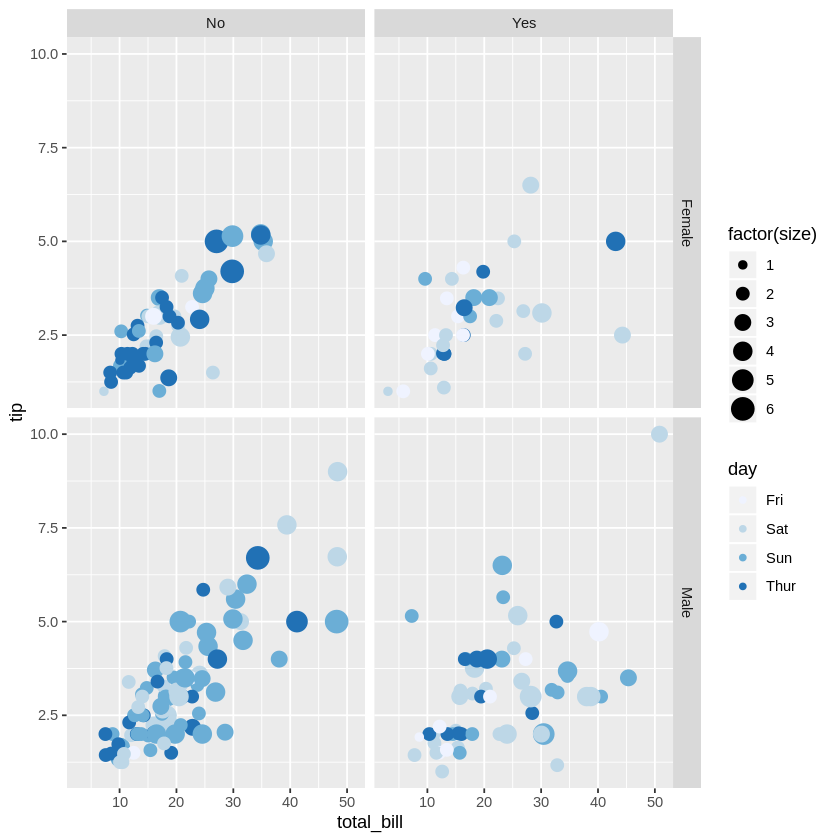

In [12]:
# YOUR CODE HERE
p <- ggplot(tips_data, aes(x=total_bill,y=tip,color=day,size=factor(size))) + geom_point()
p + scale_colour_brewer(type="seq", palette=1) + facet_grid(sex ~ smoker)

Of course, the order of the days is wrong because they are ordered with respect to the alphabetical order. We could create another attribute that would take a value according to the day such as Thur=1, Fri=2, etc. and use that to plot our scatterplot, or reorder as the example above. 

We also see that there are **too many points superposed**. Let's use transparency so that we can distinguish them a little bit more. 

**YOUR TURN**: add transparency to the points. 

Warning message:
“Using size for a discrete variable is not advised.”

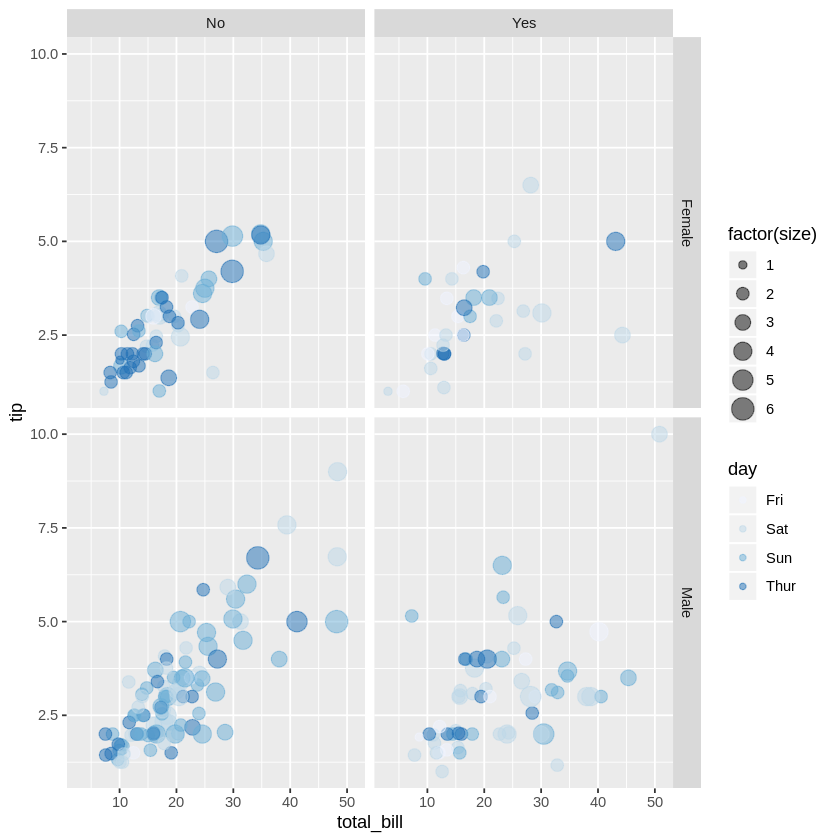

In [13]:
# YOUR CODE HERE
p <- ggplot(tips_data, aes(x=total_bill,y=tip,color=day,size=factor(size))) + geom_point(alpha=0.5)
p + scale_colour_brewer(type="seq", palette=1) + facet_grid(sex ~ smoker)

Let's use another data set we have seen in the lab. Exercises below use the fishcatch dataset. The dataset is about 159 fish that are caught and measured. They belong to seven different species. 

In [14]:
fishcatch_data=read.csv("/dsa/data/all_datasets/fishcatch/fishcatch.csv")
head(fishcatch_data)

X,obs,species,weight,length1,length2,length3,height,width,sex
<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,1,242,23.2,25.4,30.0,38.4,13.4,NA
2,2,1,290,24.0,26.3,31.2,40.0,13.8,NA
3,3,1,340,23.9,26.5,31.1,39.8,15.1,NA
4,4,1,363,26.3,29.0,33.5,38.0,13.3,NA
5,5,1,430,26.5,29.0,34.0,36.6,15.1,NA
6,6,1,450,26.8,29.7,34.7,39.2,14.2,NA


In [15]:
str(fishcatch_data)

'data.frame':	158 obs. of  10 variables:
 $ X      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ obs    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ species: int  1 1 1 1 1 1 1 1 1 1 ...
 $ weight : num  242 290 340 363 430 450 500 390 450 500 ...
 $ length1: num  23.2 24 23.9 26.3 26.5 26.8 26.8 27.6 27.6 28.5 ...
 $ length2: num  25.4 26.3 26.5 29 29 29.7 29.7 30 30 30.7 ...
 $ length3: num  30 31.2 31.1 33.5 34 34.7 34.5 35 35.1 36.2 ...
 $ height : num  38.4 40 39.8 38 36.6 39.2 41.1 36.2 39.9 39.3 ...
 $ width  : num  13.4 13.8 15.1 13.3 15.1 14.2 15.3 13.4 13.8 13.7 ...
 $ sex    : int  NA NA NA NA NA NA NA NA NA NA ...


**Activity 7:** Draw a 2D scatterplot and use **position** visual variable to represent **height** and **weight** attributes of fishcatch_data . **Do the positions of points suggest anything?**

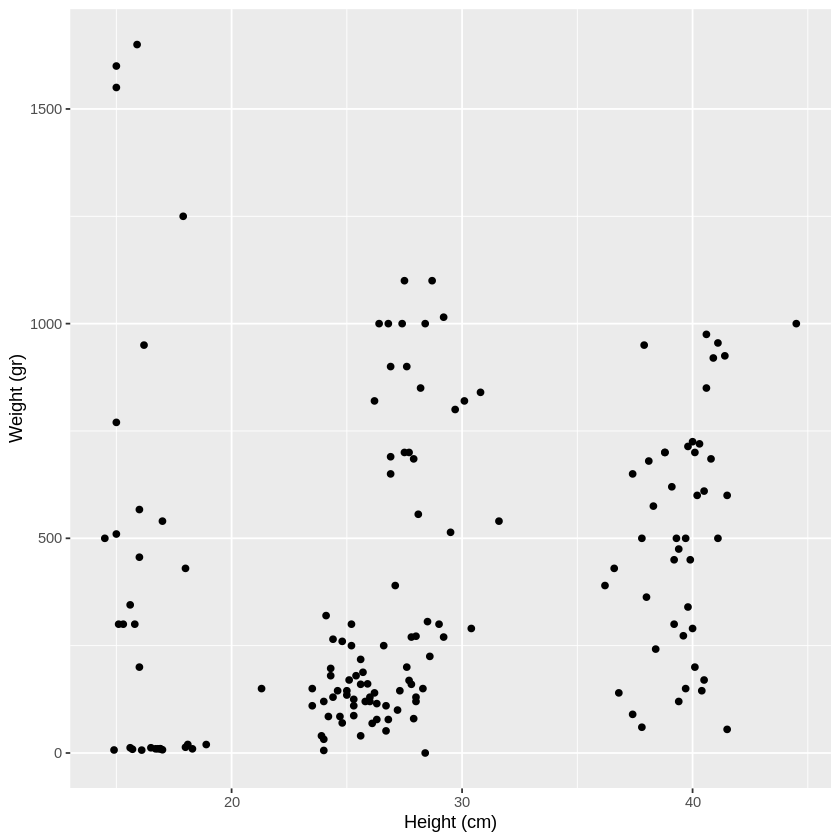

In [18]:
p3 <- ggplot(fishcatch_data, aes(x=height, y=weight)) + geom_point() # YOUR CODE HERE
p3 + xlab("Height (cm)") + ylab("Weight (gr)")

In the above plot, we can immediately see clusters of data points. Each set of points have different weights and heights. There is no way to tell which set of points belong to what species. Let's add that. 

**YOUR TURN: Let's use the color visual variable to differentiate the points among species.**

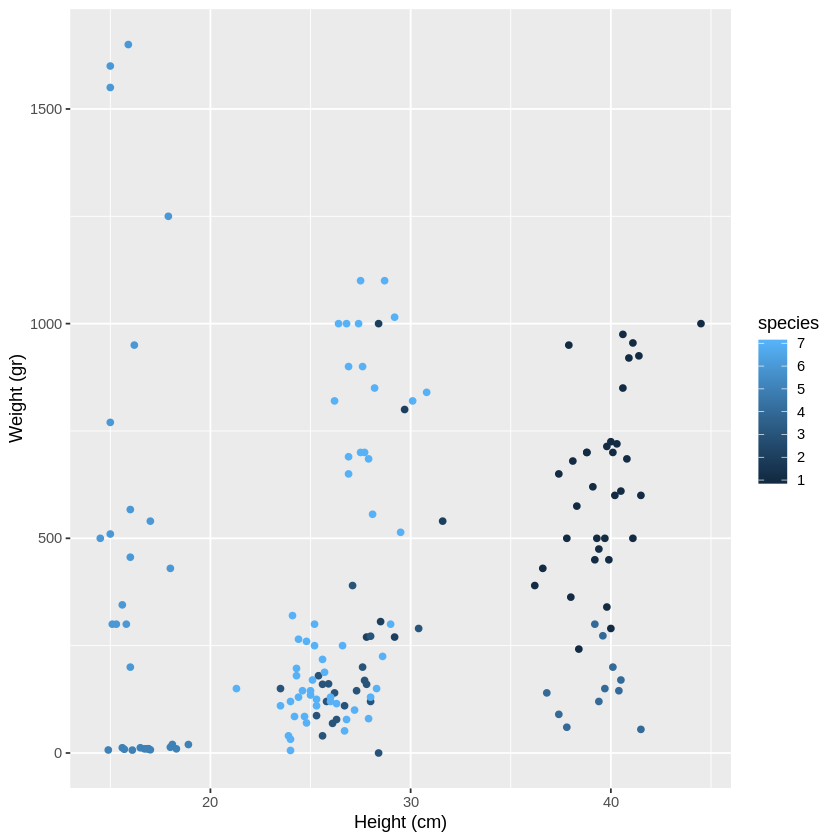

In [19]:
p3 <- ggplot(fishcatch_data, aes(x=height, y=weight, color=species)) + geom_point()# YOUR CODE HERE
p3 <- p3 + xlab("Height (cm)") + ylab("Weight (gr)")
p3

**YOUR TURN: Let's add sex attribute to the plot by assigning it to a *shape* visual variable since it is a nominal type.**

Warning message:
“Removed 87 rows containing missing values (geom_point).”

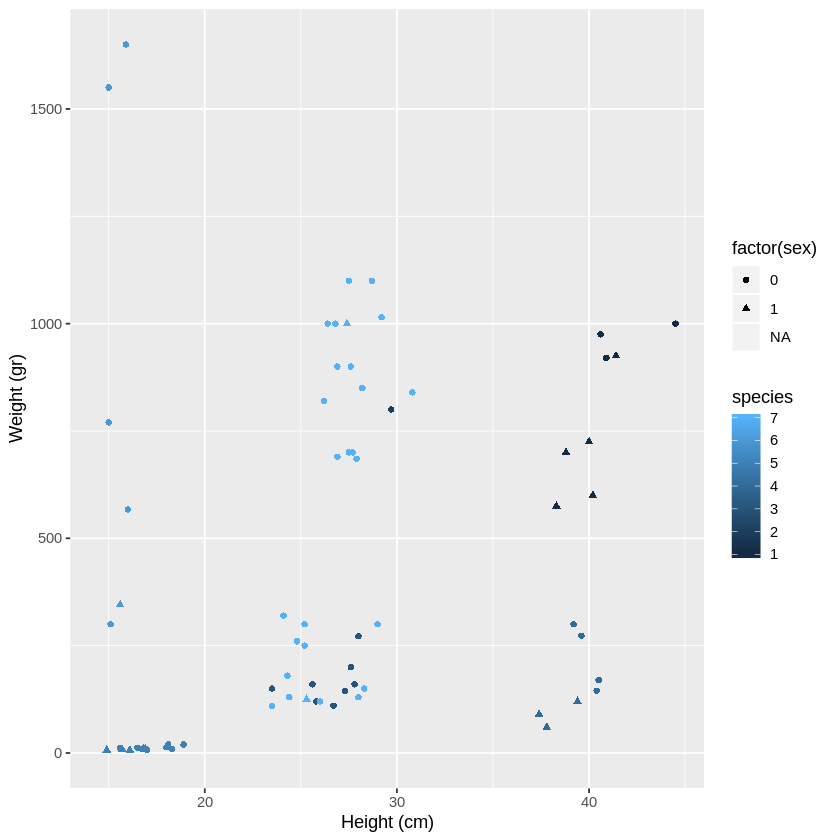

In [21]:
# YOUR CODE HERE
p3 <- ggplot(fishcatch_data, aes(x=height, y=weight, color=species, shape=factor(sex))) + geom_point()# YOUR CODE HERE
p3 <- p3 + xlab("Height (cm)") + ylab("Weight (gr)")
p3

We can see different species cluster nicely except species 3 and 7, and sex does not seem to have much of an effect. 

**We can do only so much with a scatter plot. Let's try another way of visualizing and exploring this data set.** 

**Let's do a histogram of weights to see their distribution.** 

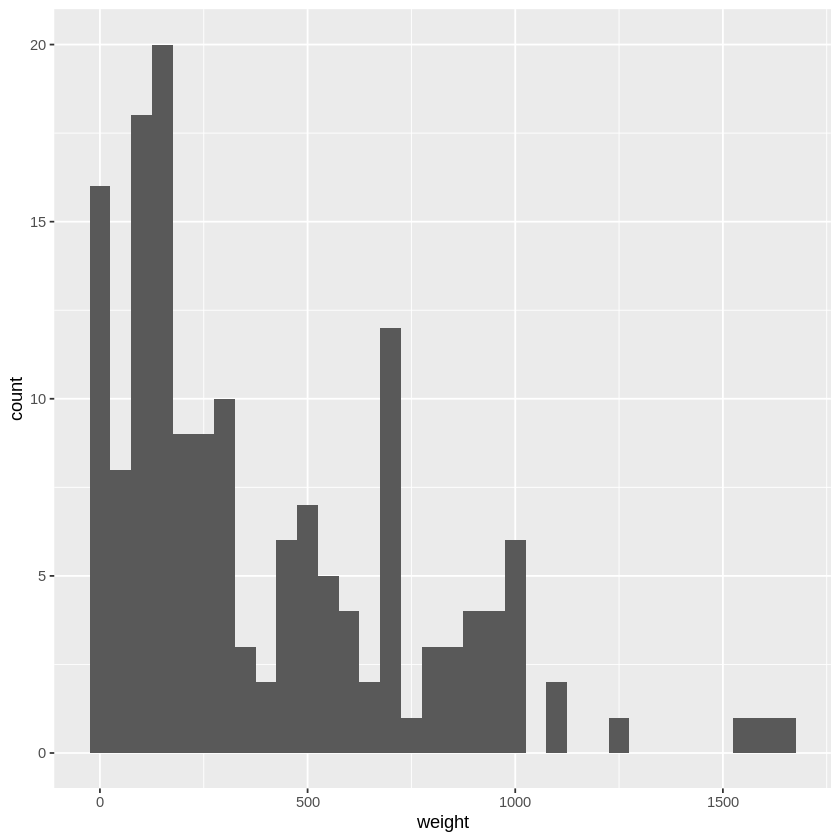

In [22]:


(p4 <- ggplot(fishcatch_data, aes(x=weight)) + geom_histogram(binwidth=50))


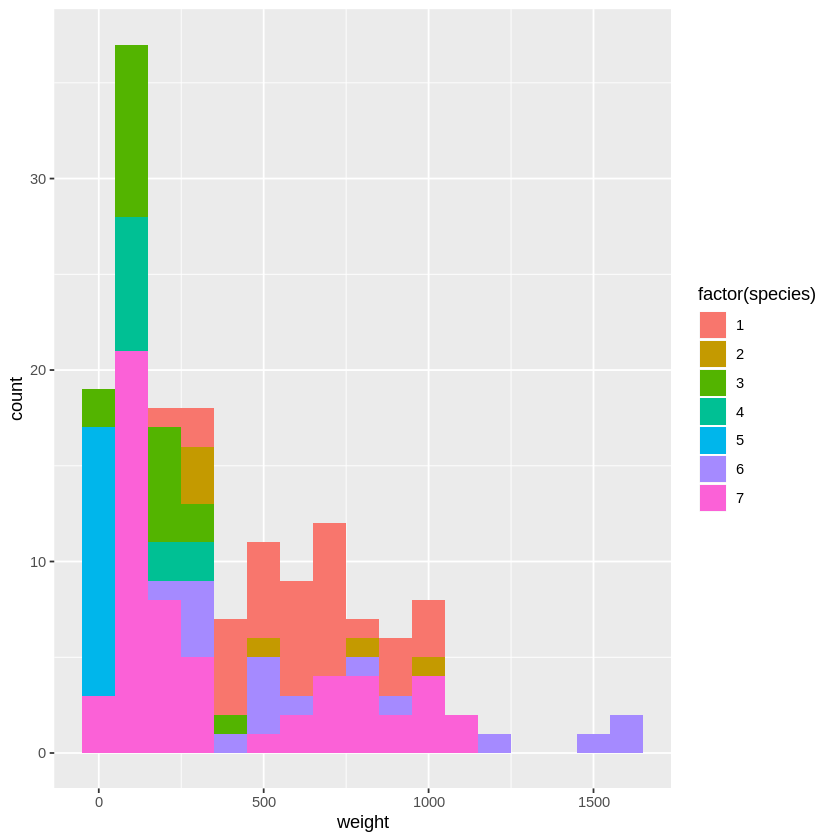

In [23]:
# we want to see it by species, so we can either do this: 
p5 <- ggplot(fishcatch_data, aes(x=weight,fill=factor(species))) + geom_histogram(binwidth=100) 
p5

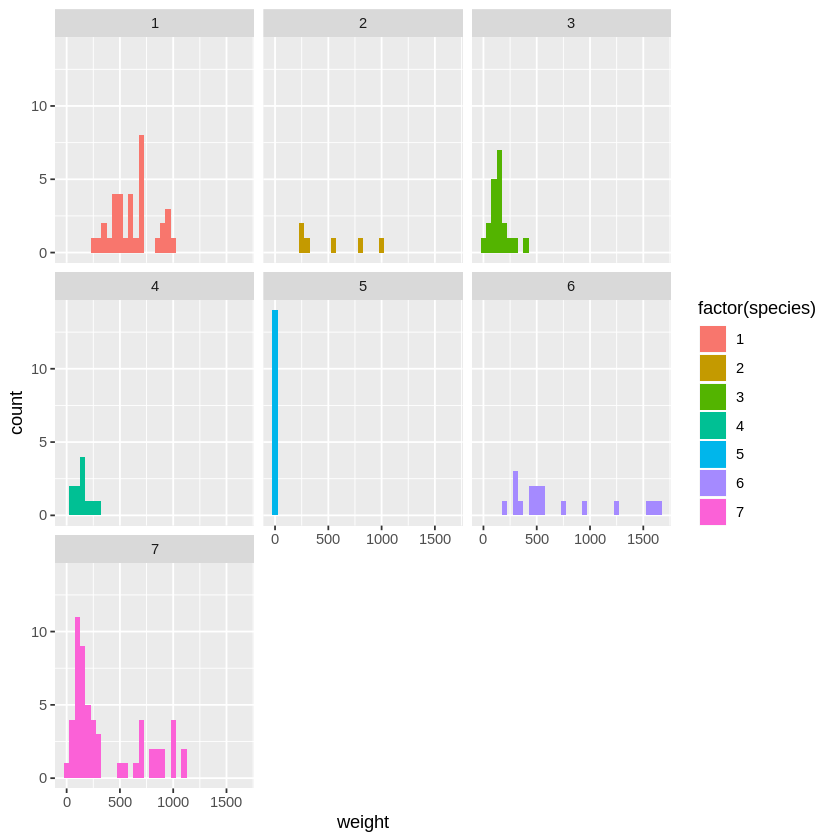

In [24]:
# or this:
p6 <- ggplot(fishcatch_data, aes(x=weight,fill=factor(species))) + geom_histogram(binwidth=50) + facet_wrap(~species)
p6


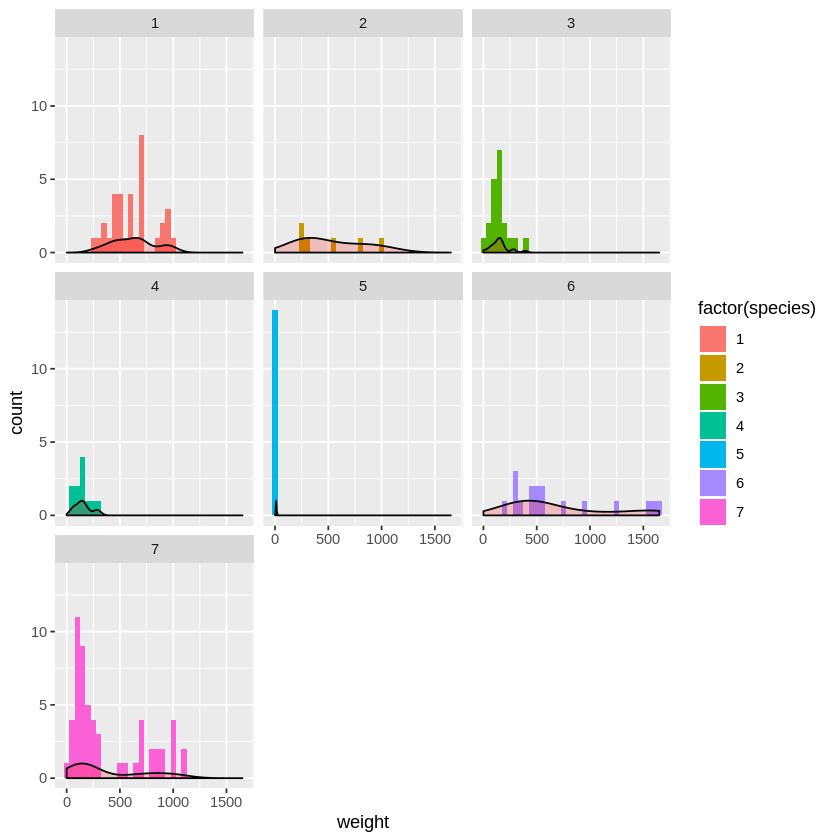

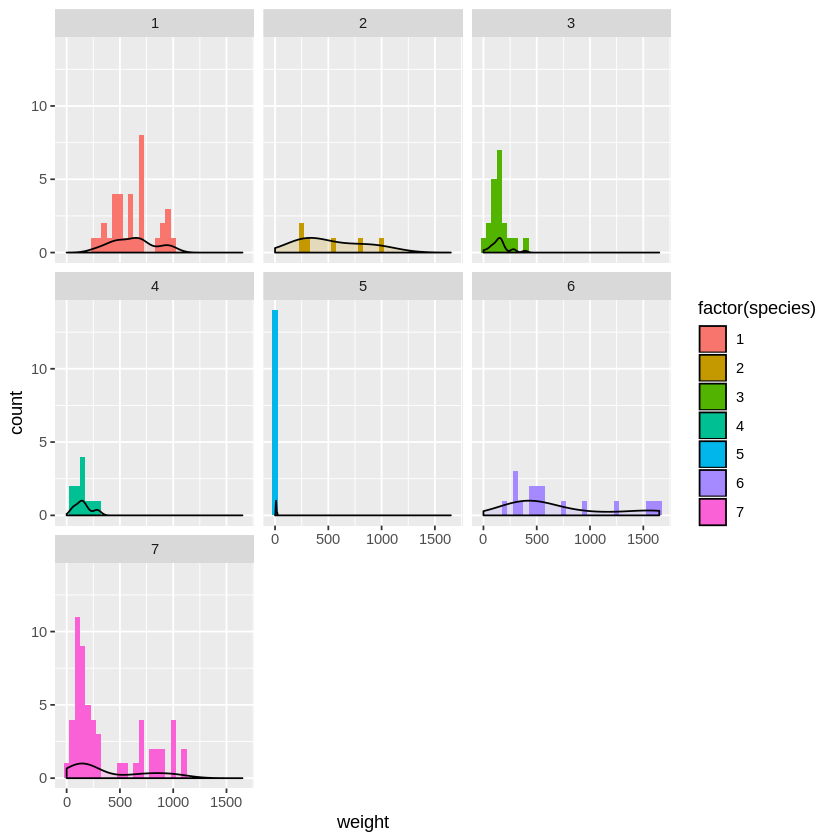

In [26]:
# We can also add densities to it. 
# We can use the computed variable ..scaled.. so that density plot does not vanish due to difference in scales. 


p6 +  geom_density(aes(y=..scaled..), alpha=0.2, fill="red") 

# or

p6 +  geom_density(aes(y=..scaled.., fill=factor(species)), alpha=0.2) 



Now, let's see how we can plot a **box and whiskers plot** to visualize the **summary statistics** of a data set. Let's use the **diamonds data** set for it; and plot color vs. price for each clarity category.

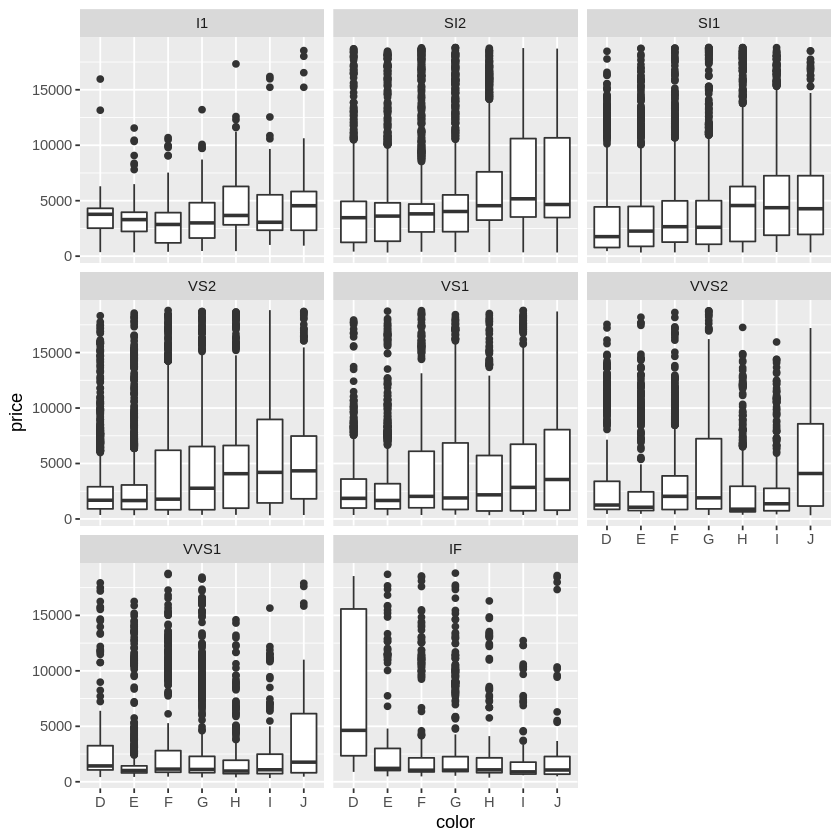

In [27]:
p7 <- ggplot(diamonds, aes(x=color, y=price)) + geom_boxplot() + facet_wrap(~ clarity)
p7

Thick black line is the median.

The edges of the box show the 25th and 75th quantiles.

The dots are the outliers. 

Because there are many outliers with very high values, scaling the y-axis with a *log scale* might be helpful. 

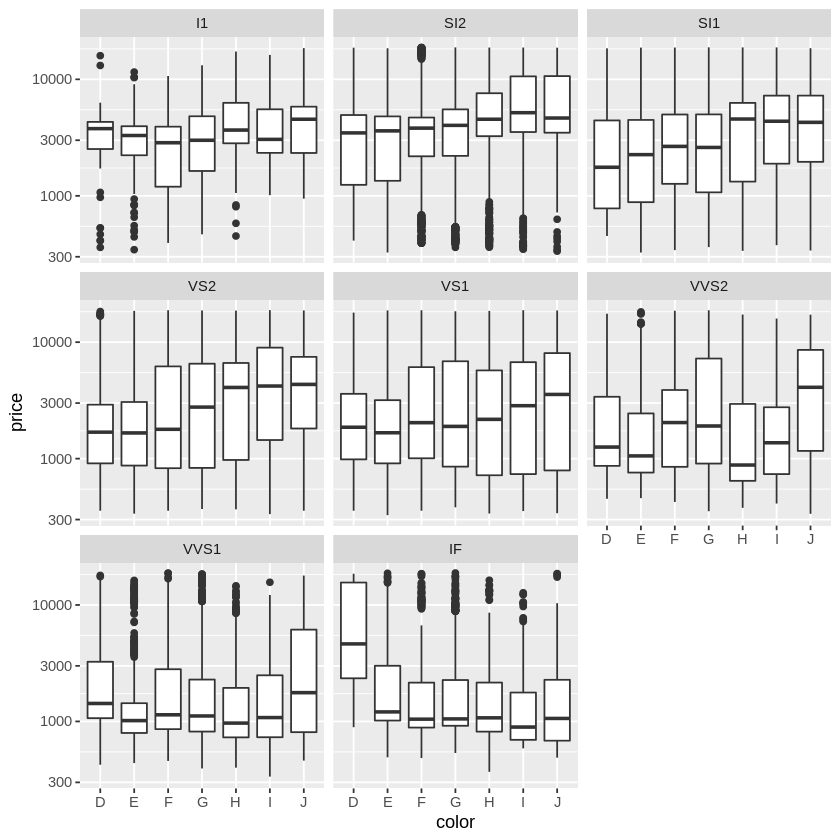

In [28]:
p7 + scale_y_log10()

This plot shows the statistics better, but it doesn't show the details of the distribution. **We can use a violin plot to see the density.** 

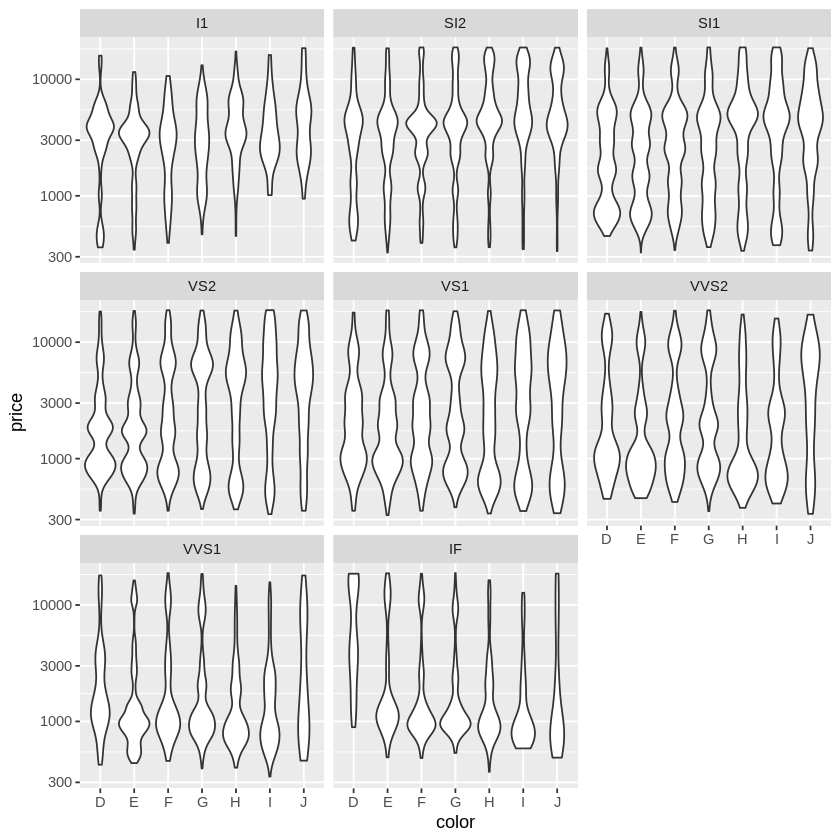

In [29]:
p7 <- ggplot(diamonds, aes(x=color, y=price)) + geom_violin() + facet_wrap(~ clarity) + scale_y_log10()
p7

Now we can see the distribution as the width at each point in this plot represents the frequency of the corresponding price.

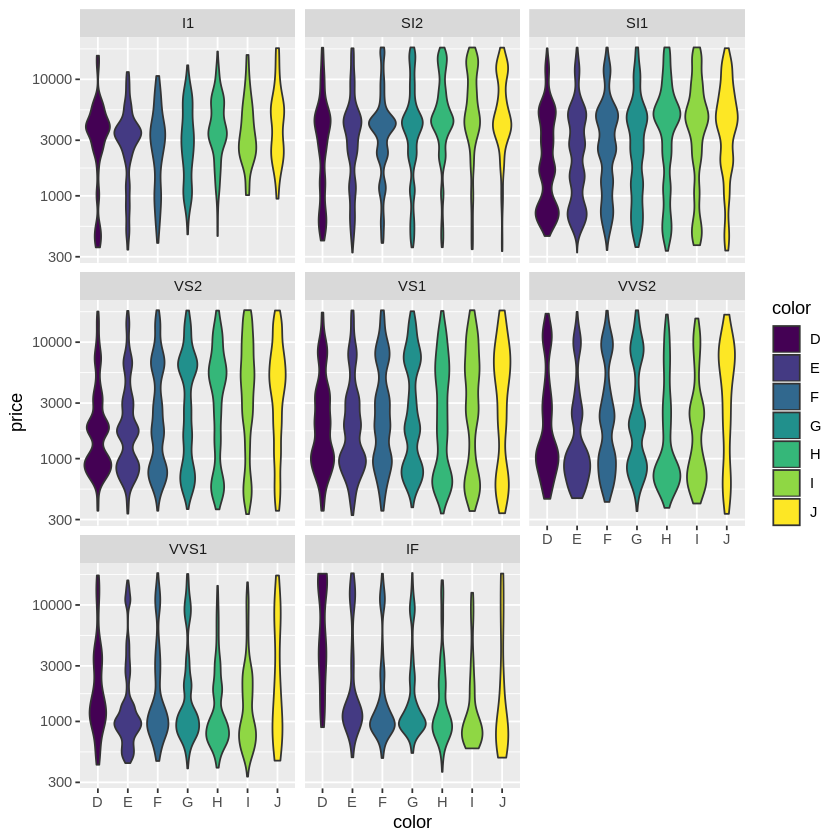

In [30]:
(p7 <- ggplot(diamonds, aes(x=color, y=price)) + geom_violin(aes(fill=color)) + facet_wrap(~ clarity) + scale_y_log10())

**Try to come up with a similar violin plot for fishcatch data. Which variables would be useful to summarize?**

